## Importación

In [1]:
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from Dict.dict_df import dict_df
from Functions.functions import save_dataframe
from Functions.functions import create_dict
from Functions.functions import create_and_save_dict
from Functions.functions import upsample

## Leer datos

In [2]:
# Agregar el directorio raíz del proyecto a sys.path
# from Dict.dict_df import dict_df
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar el diccionario desde Dict/dict_df.py
# from Dict.dict_df import dict_df

In [3]:
# Definir la ruta del archivo CSV
csv_path_df = os.path.join('Data', '.ipynb_checkpoints', 'df.csv')

# Leer el CSV usando el diccionario de tipos
df = pd.read_csv(csv_path_df, dtype=dict_df, parse_dates=['Begin_Date'])

In [4]:
# df = pd.read_csv('Data\.ipynb_checkpoints\df.csv', parse_dates=['Begin_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4849 non-null   object        
 1   Begin_Date         4849 non-null   datetime64[ns]
 2   End_Date           4849 non-null   object        
 3   Type               4849 non-null   object        
 4   Paperless_Billing  4849 non-null   object        
 5   Payment_Method     4849 non-null   object        
 6   Monthly_Charges    4849 non-null   float64       
 7   Total_Charges      4849 non-null   float64       
 8   Gender             4849 non-null   object        
 9   Senior_Citizen     4849 non-null   int64         
 10  Partner            4849 non-null   object        
 11  Dependents         4849 non-null   object        
 12  Multiple_Lines     4849 non-null   object        
 13  Internet_Service   4849 non-null   object        
 14  Online_S

In [5]:
print(df['End_Date'].value_counts())

End_Date
0    4439
1     410
Name: count, dtype: int64


## Preprocessing 

### Eliminación de la columna Customer_ID

Una vez realizada la unión de los datasets en un DataFrame __df__ ya se puede eliminar la columna __Customer_ID__ para proseguir con el preprocesamiento de los datos.

In [6]:
## Convertir la columna 'End_Date' a int
df['End_Date'] = pd.to_numeric(df['End_Date'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4849 non-null   object        
 1   Begin_Date         4849 non-null   datetime64[ns]
 2   End_Date           4849 non-null   int8          
 3   Type               4849 non-null   object        
 4   Paperless_Billing  4849 non-null   object        
 5   Payment_Method     4849 non-null   object        
 6   Monthly_Charges    4849 non-null   float64       
 7   Total_Charges      4849 non-null   float64       
 8   Gender             4849 non-null   object        
 9   Senior_Citizen     4849 non-null   int64         
 10  Partner            4849 non-null   object        
 11  Dependents         4849 non-null   object        
 12  Multiple_Lines     4849 non-null   object        
 13  Internet_Service   4849 non-null   object        
 14  Online_S

In [7]:
df = df.drop('Customer_ID', axis=1)
df.info()
print()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Begin_Date         4849 non-null   datetime64[ns]
 1   End_Date           4849 non-null   int8          
 2   Type               4849 non-null   object        
 3   Paperless_Billing  4849 non-null   object        
 4   Payment_Method     4849 non-null   object        
 5   Monthly_Charges    4849 non-null   float64       
 6   Total_Charges      4849 non-null   float64       
 7   Gender             4849 non-null   object        
 8   Senior_Citizen     4849 non-null   int64         
 9   Partner            4849 non-null   object        
 10  Dependents         4849 non-null   object        
 11  Multiple_Lines     4849 non-null   object        
 12  Internet_Service   4849 non-null   object        
 13  Online_Security    4849 non-null   object        
 14  Online_B

,Begin_Date,End_Date,Type,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Gender,Senior_Citizen,Partner,Dependents,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,2019-05-01,0,one year,yes,mailed check,65.6,593.30,female,0,yes,yes,no,dsl,no,yes,no,yes,yes,no
1,2019-05-01,0,month-to-month,no,mailed check,59.9,542.40,male,0,no,no,yes,dsl,no,no,no,no,no,yes
2,2019-09-01,1,month-to-month,yes,electronic check,73.9,280.85,male,0,no,no,no,fiber optic,no,no,yes,no,no,no
3,2018-12-01,1,month-to-month,yes,electronic check,98.0,1237.85,male,1,yes,no,no,fiber optic,no,yes,yes,no,yes,yes
4,2019-05-01,0,month-to-month,yes,credit card,69.4,571.45,female,0,no,yes,no,dsl,no,no,no,yes,yes,yes


### Extracción de información de la columna __Begin_Date__ y eliminación posterior

In [8]:
df['Year'] = df['Begin_Date'].dt.year
df['Month'] = df['Begin_Date'].dt.month
df['Day'] = df['Begin_Date'].dt.day
df['dow'] = df['Begin_Date'].dt.dayofweek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Begin_Date         4849 non-null   datetime64[ns]
 1   End_Date           4849 non-null   int8          
 2   Type               4849 non-null   object        
 3   Paperless_Billing  4849 non-null   object        
 4   Payment_Method     4849 non-null   object        
 5   Monthly_Charges    4849 non-null   float64       
 6   Total_Charges      4849 non-null   float64       
 7   Gender             4849 non-null   object        
 8   Senior_Citizen     4849 non-null   int64         
 9   Partner            4849 non-null   object        
 10  Dependents         4849 non-null   object        
 11  Multiple_Lines     4849 non-null   object        
 12  Internet_Service   4849 non-null   object        
 13  Online_Security    4849 non-null   object        
 14  Online_B

In [9]:
df = df.drop('Begin_Date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   End_Date           4849 non-null   int8   
 1   Type               4849 non-null   object 
 2   Paperless_Billing  4849 non-null   object 
 3   Payment_Method     4849 non-null   object 
 4   Monthly_Charges    4849 non-null   float64
 5   Total_Charges      4849 non-null   float64
 6   Gender             4849 non-null   object 
 7   Senior_Citizen     4849 non-null   int64  
 8   Partner            4849 non-null   object 
 9   Dependents         4849 non-null   object 
 10  Multiple_Lines     4849 non-null   object 
 11  Internet_Service   4849 non-null   object 
 12  Online_Security    4849 non-null   object 
 13  Online_Backup      4849 non-null   object 
 14  Device_Protection  4849 non-null   object 
 15  Tech_Support       4849 non-null   object 
 16  Streaming_TV       4849 

## Creación de features y target

In [10]:
target = df['End_Date']
features = df.drop('End_Date', axis=1)

### Guardar

In [11]:
save_dataframe(target, 'target')
save_dataframe(features, 'features')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features.csv


### One-Hot Encoding

Se transformaran los datos inicialmente utilizando One-Hot Encoding para el caso de las columnas categóricas para entrenar un modelo de regresión logística.

In [12]:
df_ohe = pd.get_dummies(features, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Monthly_Charges                  4849 non-null   float64
 1   Total_Charges                    4849 non-null   float64
 2   Senior_Citizen                   4849 non-null   int64  
 3   Year                             4849 non-null   int32  
 4   Month                            4849 non-null   int32  
 5   Day                              4849 non-null   int32  
 6   dow                              4849 non-null   int32  
 7   Type_one year                    4849 non-null   bool   
 8   Type_two year                    4849 non-null   bool   
 9   Paperless_Billing_yes            4849 non-null   bool   
 10  Payment_Method_credit card       4849 non-null   bool   
 11  Payment_Method_electronic check  4849 non-null   bool   
 12  Payment_Method_maile

#### Guardar

In [13]:
save_dataframe(df_ohe, 'df_ohe')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\df_ohe.csv


### Codificación de etiquetas

Se  transformaron las columnas categóricas mediante la técnica de codificación de etiquetas para ocuparlas posteriormente en el entrenamiento de modelos de árboles de decisón y bosques aleatorios.

In [14]:
encoder = OrdinalEncoder()
encoder.fit(df)
data_ordinal = encoder.transform(df)
data_ordinal = pd.DataFrame(encoder.transform(df), columns=df.columns)

print(data_ordinal.head())

   End_Date  Type  Paperless_Billing  Payment_Method  Monthly_Charges  \
0       0.0   1.0                1.0             3.0            430.0   
1       0.0   0.0                0.0             3.0            339.0   
2       1.0   0.0                1.0             2.0            564.0   
3       1.0   0.0                1.0             2.0           1001.0   
4       0.0   0.0                1.0             1.0            489.0   

   Total_Charges  Gender  Senior_Citizen  Partner  Dependents  ...  \
0         1078.0     0.0             0.0      1.0         1.0  ...   
1         1008.0     1.0             0.0      0.0         0.0  ...   
2          602.0     1.0             0.0      0.0         0.0  ...   
3         1826.0     1.0             1.0      1.0         0.0  ...   
4         1047.0     0.0             0.0      0.0         1.0  ...   

   Online_Security  Online_Backup  Device_Protection  Tech_Support  \
0              0.0            1.0                0.0           1.0   


In [15]:
data_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   End_Date           4849 non-null   float64
 1   Type               4849 non-null   float64
 2   Paperless_Billing  4849 non-null   float64
 3   Payment_Method     4849 non-null   float64
 4   Monthly_Charges    4849 non-null   float64
 5   Total_Charges      4849 non-null   float64
 6   Gender             4849 non-null   float64
 7   Senior_Citizen     4849 non-null   float64
 8   Partner            4849 non-null   float64
 9   Dependents         4849 non-null   float64
 10  Multiple_Lines     4849 non-null   float64
 11  Internet_Service   4849 non-null   float64
 12  Online_Security    4849 non-null   float64
 13  Online_Backup      4849 non-null   float64
 14  Device_Protection  4849 non-null   float64
 15  Tech_Support       4849 non-null   float64
 16  Streaming_TV       4849 

In [16]:
target_ord = data_ordinal['End_Date']
features_ord = data_ordinal.drop('End_Date', axis=1)

#### Guardar

In [17]:
save_dataframe(data_ordinal, 'data_ordinal')
save_dataframe(target_ord, 'target_ord')
save_dataframe(features_ord, 'features_ord')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\data_ordinal.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_ord.csv


## Segmentación de los datos

### Para regresión logística

In [18]:
# Primera división: 40% a temp, 60% para entrenamiento con estratificación
features_train, features_temp, target_train, target_temp = train_test_split(
    df_ohe, target, test_size=0.4, random_state=12345
)

# Segunda división: 50% de temp para validación y 50% para prueba con estratificación
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345
)

### Para bosques aleatorios

In [19]:
# Primera división: 40% de temp, 60% para entrenamiento
features_train_ord, features_temp_ord, target_train_ord, target_temp_ord = train_test_split(
    features_ord, target_ord, test_size=0.4, random_state=12345
)

# # Segunda división: 50% de los datos restantes de la división incial para validación y 50% para prueba
features_valid_ord, features_test_ord, target_valid_ord, target_test_ord = train_test_split(
    features_temp_ord, target_temp_ord, test_size=0.5, random_state=12345
)

## Escalamiento de caractarísticas númericas con StandardScaler.

In [20]:
numeric = ['Monthly_Charges', 'Total_Charges', 'Senior_Citizen', 'Year', 'Month', 'Day', 'dow']

### Para regresión logística

In [21]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
print(features_train.head())

      Monthly_Charges  Total_Charges  Senior_Citizen      Year     Month  Day  \
3164         0.470300      -0.849640       -0.406774  1.311553 -0.116497  0.0   
3989        -1.414190      -0.573924       -0.406774 -0.781033 -0.959508  0.0   
972          0.728863       1.453072       -0.406774 -1.304180 -0.116497  0.0   
66           0.687619      -0.457868       -0.406774  0.788407  0.164506  0.0   
3969         1.152397      -0.731979       -0.406774  1.311553 -0.397501  0.0   

           dow  Type_one year  Type_two year  Paperless_Billing_yes  ...  \
3164  0.857784          False          False                   True  ...   
3989  1.355946          False           True                  False  ...   
972   1.355946          False           True                   True  ...   
66    1.355946          False          False                   True  ...   
3969 -0.636702          False          False                   True  ...   

      Dependents_yes  Multiple_Lines_yes  Internet_Servi

#### Guardar

In [22]:
save_dataframe(features_train, 'features_train')
save_dataframe(features_valid, 'features_valid')
save_dataframe(features_test, 'features_test')
save_dataframe(target_train, 'target_train')
save_dataframe(target_valid, 'target_valid')
save_dataframe(target_test, 'target_test')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_train.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_valid.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_test.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_train.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_valid.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_test.csv


### Para bosques aleatorios

In [23]:
scaler_ord = StandardScaler()
scaler_ord.fit(features_train_ord[numeric])
features_train_ord[numeric] = scaler_ord.transform(features_train_ord[numeric])
features_valid_ord[numeric] = scaler_ord.transform(features_valid_ord[numeric])
print(features_train_ord.head())

      Type  Paperless_Billing  Payment_Method  Monthly_Charges  Total_Charges  \
3164   0.0                1.0             0.0         0.342063      -0.872332   
3989   2.0                0.0             3.0        -1.217450      -0.311840   
972    2.0                1.0             2.0         0.713492       1.323293   
66     0.0                1.0             2.0         0.659377      -0.102560   
3969   0.0                1.0             2.0         1.306304      -0.622500   

      Gender  Senior_Citizen  Partner  Dependents  Multiple_Lines  ...  \
3164     0.0       -0.406774      0.0         0.0             0.0  ...   
3989     0.0       -0.406774      1.0         1.0             0.0  ...   
972      0.0       -0.406774      0.0         0.0             1.0  ...   
66       0.0       -0.406774      1.0         0.0             1.0  ...   
3969     1.0       -0.406774      1.0         1.0             0.0  ...   

      Online_Security  Online_Backup  Device_Protection  Tech_Suppor

#### Guardar

In [24]:
save_dataframe(features_train_ord, 'features_train_ord')
save_dataframe(features_valid_ord, 'features_valid_ord')
save_dataframe(features_test_ord, 'features_test_ord')
save_dataframe(target_train_ord, 'target_train_ord')
save_dataframe(target_valid_ord, 'target_valid_ord')
save_dataframe(target_test_ord, 'target_test_ord')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_train_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_valid_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_test_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_train_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_valid_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_test_ord.csv


#### Creación de  scripts

In [25]:
create_and_save_dict(features_train_ord, 'features_train_ord')
create_and_save_dict(target_train_ord, 'target_train_ord')

Diccionario generado y guardado exitosamente en: Dict\dict_features_train_ord.py
Diccionario generado y guardado exitosamente en: Dict\dict_target_train_ord.py


## Desequilibrio de clases

Comprobar el desequilibrio de las clases en la columna __'End_Date'__

In [26]:
target.info()

print(target.isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 4849 entries, 0 to 4848
Series name: End_Date
Non-Null Count  Dtype
--------------  -----
4849 non-null   int8 
dtypes: int8(1)
memory usage: 4.9 KB
0


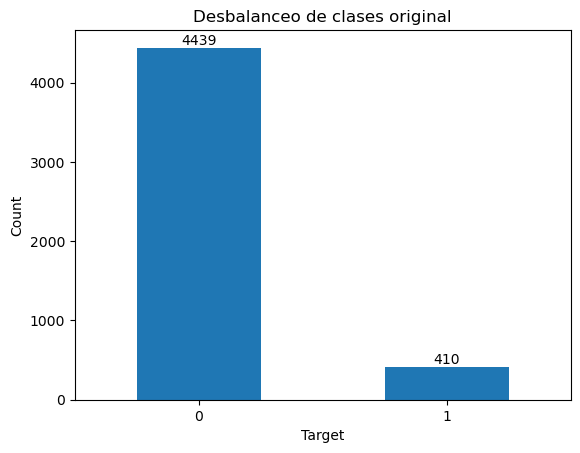

In [27]:
ax = target.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Desbalanceo de clases original')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

Se observa que exite un desiquilibrio de clases en la columna target __'End_Date'__ en un proporción apróximada de 10:1 entre la clase __0__ y __1__ respectivamente. Lo anterior se puede solucionar utiiizando el sobremuestreo.

## Sobremuestreo

### Para regresión logística

#### Dividir el conjunto de datos de entrenamiento en observaciones negativas y positivas;

In [28]:
print(features_train.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_valid.shape)

(2909, 25)
(970, 25)
(2909,)
(970,)


In [29]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(2665, 25)
(244, 25)
(2665,)
(244,)


In [30]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 11)

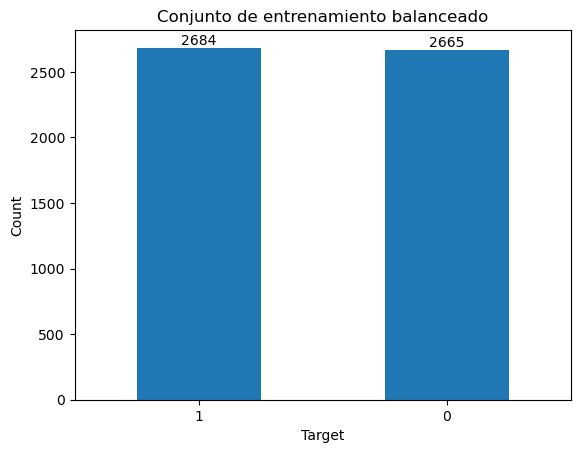

In [31]:
ax = target_upsampled.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Conjunto de entrenamiento balanceado')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

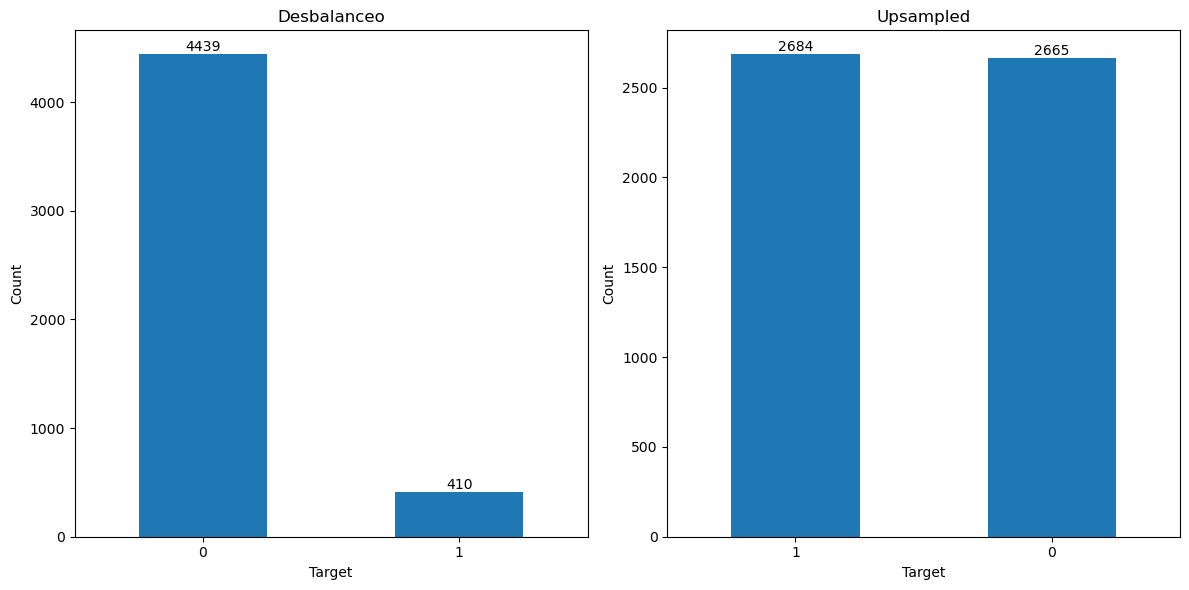

In [32]:
# Comparación 

# Crear una figura con dos subgráficos
# 1 fila, 2 columnas, tamaño de la figura
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico
ax1 = axes[0]
target.value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticks(ax1.get_xticks())  # Mantener las posiciones de los ticks
# Sin rotación en etiquetas
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xlabel('Target')
ax1.set_ylabel('Count')
ax1.set_title('Desbalanceo')

# Etiquetas en las barras
for p in ax1.containers:
    ax1.bar_label(p, label_type='edge')

# Segundo gráfico
ax2 = axes[1]
target_upsampled.value_counts().plot(kind='bar', ax=ax2)
ax2.set_xticks(ax2.get_xticks())  # Mantener las posiciones de los ticks
# Sin rotación en etiquetas
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel('Target')
ax2.set_ylabel('Count')
ax2.set_title('Upsampled')

# Etiquetas en las barras
for p in ax2.containers:
    ax2.bar_label(p, label_type='edge')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

#### Guardar

In [33]:
save_dataframe(features_upsampled, 'features_upsampled')
save_dataframe(target_upsampled, 'target_upsampled')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_upsampled.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_upsampled.csv


#### Creación de scripts

In [34]:
create_and_save_dict(features_upsampled, 'features_upsampled')
create_and_save_dict(target_upsampled, 'target_upsampled')
create_and_save_dict(features_valid, 'features_valid')
create_and_save_dict(target_valid, 'target_valid')

Diccionario generado y guardado exitosamente en: Dict\dict_features_upsampled.py
Diccionario generado y guardado exitosamente en: Dict\dict_target_upsampled.py
Diccionario generado y guardado exitosamente en: Dict\dict_features_valid.py
Diccionario generado y guardado exitosamente en: Dict\dict_target_valid.py


### Para bosques aleatorios

In [35]:
print(features_train_ord.shape)
print(features_valid_ord.shape)
print(target_train_ord.shape)
print(target_valid_ord.shape)

(2909, 21)
(970, 21)
(2909,)
(970,)


In [36]:
features_zeros_ord = features_train_ord[target_train_ord == 0]
features_ones_ord = features_train_ord[target_train_ord == 1]
target_zeros_ord = target_train_ord[target_train_ord == 0]
target_ones_ord = target_train_ord[target_train_ord == 1]

print(features_zeros_ord.shape)
print(features_ones_ord.shape)
print(target_zeros_ord.shape)
print(target_ones_ord.shape)

(2665, 21)
(244, 21)
(2665,)
(244,)


In [37]:
features_upsampled_ord, target_upsampled_ord = upsample(features_train_ord, target_train_ord, 11)

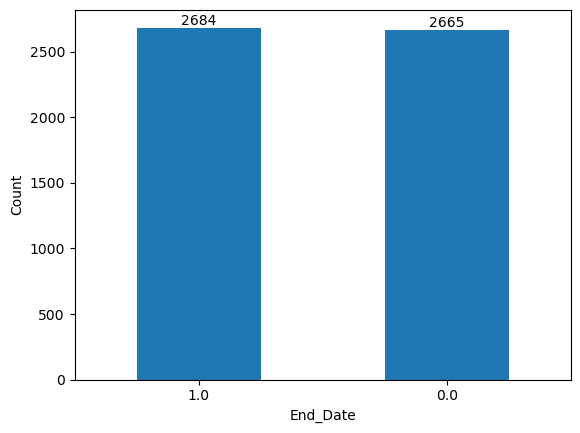

In [38]:
ax = target_upsampled_ord.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('End_Date')
plt.ylabel('Count')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

#### Guardar

In [39]:
save_dataframe(features_upsampled_ord, 'features_upsampled_ord')
save_dataframe(target_upsampled_ord, 'target_upsampled_ord')

DataFrame guardado exitosamente en Data\.ipynb_checkpoints\features_upsampled_ord.csv
DataFrame guardado exitosamente en Data\.ipynb_checkpoints\target_upsampled_ord.csv


#### Creación de scripts

In [40]:
create_and_save_dict(features_upsampled_ord, 'features_upsampled_ord')
create_and_save_dict(target_upsampled_ord, 'target_upsampled_ord')
create_and_save_dict(features_valid_ord, 'features_valid_ord')
create_and_save_dict(target_valid_ord, 'target_valid_ord')

Diccionario generado y guardado exitosamente en: Dict\dict_features_upsampled_ord.py
Diccionario generado y guardado exitosamente en: Dict\dict_target_upsampled_ord.py
Diccionario generado y guardado exitosamente en: Dict\dict_features_valid_ord.py
Diccionario generado y guardado exitosamente en: Dict\dict_target_valid_ord.py


In [41]:
features_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5349 entries, 1341 to 2187
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Monthly_Charges                  5349 non-null   float64
 1   Total_Charges                    5349 non-null   float64
 2   Senior_Citizen                   5349 non-null   float64
 3   Year                             5349 non-null   float64
 4   Month                            5349 non-null   float64
 5   Day                              5349 non-null   float64
 6   dow                              5349 non-null   float64
 7   Type_one year                    5349 non-null   bool   
 8   Type_two year                    5349 non-null   bool   
 9   Paperless_Billing_yes            5349 non-null   bool   
 10  Payment_Method_credit card       5349 non-null   bool   
 11  Payment_Method_electronic check  5349 non-null   bool   
 12  Payment_Method_mailed 

In [42]:
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 2214 to 2670
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Monthly_Charges                  970 non-null    float64
 1   Total_Charges                    970 non-null    float64
 2   Senior_Citizen                   970 non-null    float64
 3   Year                             970 non-null    float64
 4   Month                            970 non-null    float64
 5   Day                              970 non-null    float64
 6   dow                              970 non-null    float64
 7   Type_one year                    970 non-null    bool   
 8   Type_two year                    970 non-null    bool   
 9   Paperless_Billing_yes            970 non-null    bool   
 10  Payment_Method_credit card       970 non-null    bool   
 11  Payment_Method_electronic check  970 non-null    bool   
 12  Payment_Method_mailed c